In [52]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable


In [53]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [54]:
filename='344-3-0-0 copy.wav'

In [55]:
import IPython.display as ipd
import librosa
import librosa.display
#display sound waves 

In [56]:
ls

344-3-0-0 copy.wav  UrbanSound8K.csv    eda.ipynb
README.md           audio/              saved_models/


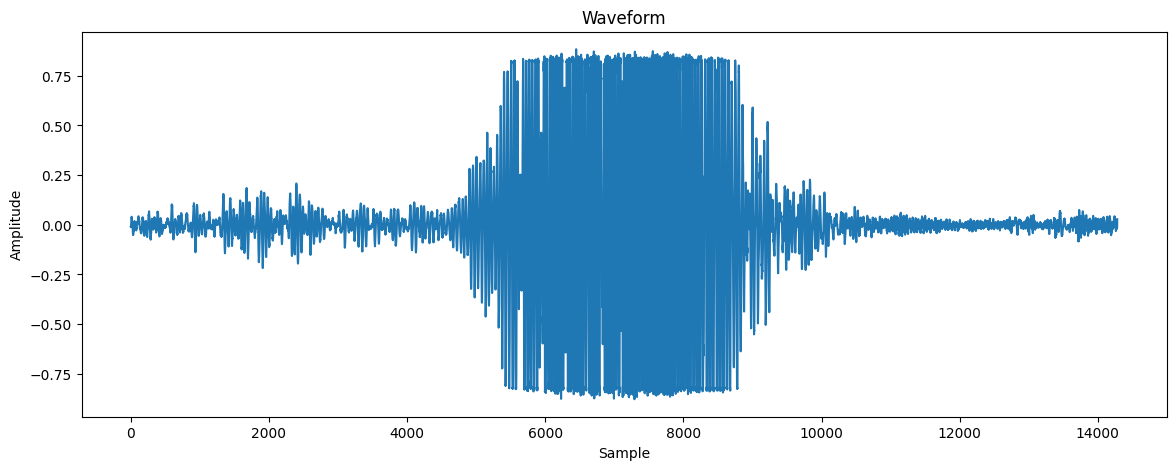

In [57]:
data, sample_rate = librosa.load(filename)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(data)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
ipd.Audio(filename)

In [58]:
sample_rate #how many times per second sound is sampled.

22050

In [59]:
from scipy.io import wavfile as wav 
wave_sample_rate,wave_audio=wav.read(filename)

In [60]:
wave_sample_rate

48000

In [61]:
wave_audio

array([-535, -494, -371, ...,  340,  844, 1216], dtype=int16)

In [62]:
data #monochannel

array([-0.01132836, -0.01227848, -0.00321344, ..., -0.0143243 ,
        0.00380835,  0.02809132], dtype=float32)

librosa normalises the wave audio while scipy doesnot normalise.

In [63]:
import pandas as pd 
metadata=pd.read_csv("UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [64]:
#check if data is inbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

Extract features: MEL-frequency cepstral coefficients from the audio samples. the mfcc summarizes the frequency distribution across the window size, so it is possible to analyse both frequency & time characteristics of sound .
this will allow us to identify features of classification.

In [65]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 28)


In [66]:
import pandas as pd 
import os
import librosa
audio_dataset_path='audio'
metadata=pd.read_csv("UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [67]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [68]:
!pip install resampy


Defaulting to user installation because normal site-packages is not writeable


In [69]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:05, 14.68it/s]/Users/rohansridhar/Library/Python/3.9/lib/python/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [09:51, 22.14it/s]/Users/rohansridhar/Library/Python/3.9/lib/python/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/rohansridhar/Library/Python/3.9/lib/python/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [10:16, 14.15it/s]


In [70]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [71]:
### Split the dataset into independent and dependent dataset
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [72]:
x.shape

(8732, 40)

In [73]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [74]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
x_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009264e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [77]:
x_train.shape

(6985, 40)

In [78]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [79]:
num_labels=y.shape[1]
num_labels

10

In [80]:
x_train.shape

(6985, 40)

In [81]:
y_train.shape

(6985, 10)

In [82]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [89]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [90]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
195/219 [=========================>....] - ETA: 0s - loss: 0.9717 - accuracy: 0.6792
Epoch 1: val_loss improved from inf to 0.78860, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 0.9766 - accuracy: 0.6797 - val_loss: 0.7886 - val_accuracy: 0.7544
Epoch 2/100
193/219 [=========================>....] - ETA: 0s - loss: 0.9628 - accuracy: 0.6809
Epoch 2: val_loss improved from 0.78860 to 0.76571, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.9535 - accuracy: 0.6826 - val_loss: 0.7657 - val_accuracy: 0.7539
Epoch 3/100
199/219 [==========================>...] - ETA: 0s - loss: 0.9630 - accuracy: 0.6683
Epoch 3: val_loss did not improve from 0.76571
219/219 [==============================] - 0s 2ms/step - loss: 0.9647 - accuracy: 0.6702 - val_loss: 0.7898 - val_accuracy: 0.7521
Epoch 4/100
181/219 [=======================>......] - ETA:

In [91]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.7830566763877869


In [104]:
filename="344-3-0-0 copy.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predictions=model.predict(mfccs_scaled_features)
predicted_labels = predictions.argmax(axis=1)
print("Predicted Label Indices:", predicted_labels)

# Assuming you have a label encoder named 'labelencoder' for inverse transformation
prediction_classes = labelencoder.inverse_transform(predicted_labels)
print("Predicted Classes:", prediction_classes)

[-174.52171     130.55452       2.389238     21.17153     -24.194946
   -6.8989615   -35.754745    -25.085094    -22.095884      4.322051
   -2.184285     -1.9364316    -5.3885736     2.866087     -1.3433838
    6.1878023     2.0523267     3.8598819    -0.623577     -2.8332522
   -5.9907827    -1.5539763    -5.7385583    -2.5347996    -3.8280067
    3.1364458     1.9195821     1.4368669     0.8564474     2.1540487
   -0.26395932    0.70072407    2.6262996    -0.95601326   -1.7428205
   -3.0091102    -2.822851      1.903848      0.44119295   -1.5472165 ]
[[-174.52171     130.55452       2.389238     21.17153     -24.194946
    -6.8989615   -35.754745    -25.085094    -22.095884      4.322051
    -2.184285     -1.9364316    -5.3885736     2.866087     -1.3433838
     6.1878023     2.0523267     3.8598819    -0.623577     -2.8332522
    -5.9907827    -1.5539763    -5.7385583    -2.5347996    -3.8280067
     3.1364458     1.9195821     1.4368669     0.8564474     2.1540487
    -0.26395932 

In [109]:
import librosa
import numpy as np

# Load audio file and extract MFCC features
filename = "/Users/rohansridhar/Desktop/audio/Audio-Classifier/audio/fold5/6508-9-0-2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape MFCC features for prediction
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print("MFCCs Scaled Features Shape:", mfccs_scaled_features.shape)

# Make predictions using the model
predictions = model.predict(mfccs_scaled_features)

# Extract predicted class labels
predicted_labels = []
for prediction in predictions:
    max_prob_index = np.argmax(prediction)
    predicted_labels.append(max_prob_index)

# Inverse transform predicted labels to class names using label encoder
prediction_classes = labelencoder.inverse_transform(predicted_labels)
print("Predicted Classes:", prediction_classes)


MFCCs Scaled Features Shape: (1, 40)
1/1 [==============================] - 0s 28ms/step
Predicted Classes: ['street_music']
